Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
input_data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
input_data shape: (55000, 784)


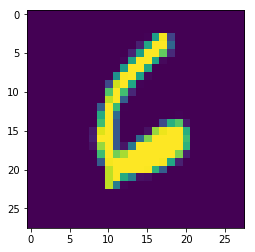

test_data shape: (10000, 784)
valid_data shape: (5000, 784)
mnist.train.num_examples is  55000
Epoch: 0001 cost= 8.587842906
Model saved in file: ./model_dir/model-1
Epoch: 0002 cost= 4.423179773
Model saved in file: ./model_dir/model-2
Epoch: 0003 cost= 3.097367954
Model saved in file: ./model_dir/model-3
Epoch: 0004 cost= 2.443893532
Model saved in file: ./model_dir/model-4
Epoch: 0005 cost= 2.055895340
Model saved in file: ./model_dir/model-5
Epoch: 0006 cost= 1.804812628
Model saved in file: ./model_dir/model-6
Epoch: 0007 cost= 1.630560501
Model saved in file: ./model_dir/model-7
Epoch: 0008 cost= 1.502507678
Model saved in file: ./model_dir/model-8
Epoch: 0009 cost= 1.403805336
Model saved in file: ./model_dir/model-9
Epoch: 0010 cost= 1.324863386
Model saved in file: ./model_dir/model-10
Epoch: 0011 cost= 1.260017109
Model saved in file: ./model_dir/model-11
Epoch: 0012 cost= 1.205221933
Model saved in file: ./model_dir/model-12
Epoch: 0013 cost= 1.158476349
Model saved in file:

In [31]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
#导入tensor模型的一些工具
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
#考虑到终端没有GUI的情况
try:
    import pylab
except ModuleNotFoundError:
    print("pylab not import")
#每一张图片是一个28*28 像素的图片，可以通过一个矩阵来表示这个图片，非零代表有颜色的地方，0代表空白的地方。
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
print("input_data:", mnist.train.images)
print("input_data shape:", mnist.train.images.shape)
im = mnist.train.images[3]
im = im.reshape(-1, 28)
try:
    pylab.imshow(im)
    pylab.show()
except NameError:
    print("pylab not define")
print("test_data shape:", mnist.test.images.shape)
print("valid_data shape:", mnist.validation.images.shape)


#重置图
tf.reset_default_graph()
#定义学习参数
#定义占位符
#x是通过placeholder创建的一个占位符，数据的类型是float32类型，None代表可以输入任意张mnist图片，
#每张图片展开成28x28=784维的向量
x = tf.placeholder(tf.float32, [None, 784]) #MNIST数据集维度是28X28=784
y = tf.placeholder(tf.float32, [None, 10]) # 数字0-9， 共10个类别

#模型同时也需要权值和偏值，这里采用Variable，它代表了一个可以修改的张量
W = tf.Variable(tf.random_normal(([784, 10])))
b = tf.Variable(tf.zeros([10]))

#预测值
#Softmax
#Softmax 可以看成是一个激励（activation）函数或者链接（link）函数，
#把我们定义的线性函数的输出转换成我们想要的格式，也就是关于 10 个数字类的概率分布。
#因此，给定一张图片，它对于每一个数字的吻合度可以被 Softmax 函数转换成为一个概率值。
#Softmax 函数可以定义为：
#pred:可以发现y也会是一个10维的向量，1~10维度，分别代表了这个数字是0~9的概率大小
#概率最大者就代表这个手写体被预测为什么
pred = tf.nn.softmax(tf.matmul(x, W) +b)

#定义反向传播结构
#损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
#损失函数2
# y_ = tf.placeholder(tf.float32, [None, 10])
# cost = tf.reduce_mean(
#     tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=pred))
#定义参数
learning_rate = 0.01
#使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#开始模型训练
training_epoch = 100
batch_size = 100
display_step = 1
saver = tf.train.Saver(max_to_keep = 1)
savedir = "./model_dir/"
modle_file = savedir + "model"

print("mnist.train.num_examples is ", mnist.train.num_examples)
#启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())#初始化OP
    ckpt = tf.train.get_checkpoint_state(savedir)
    if not (ckpt == None):
        if ckpt and ckpt.model_checkpoint_path:
            saver.restore(sess, ckpt.model_checkpoint_path)
            
    else:
        for epoch in range(training_epoch):
            avg_cost = 0

            total_batch = int(mnist.train.num_examples/batch_size)
            #循环所有的数据集
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                # 运行优化器
                _, c = sess.run([optimizer, cost], feed_dict={x:batch_xs, y:batch_ys})
                #计算均值
                avg_cost += c /total_batch
            # 显示训练的详细xinx
            if (((epoch + 1) % display_step) == 0) and (not (avg_cost == "nan")):
                print("Epoch:", '%04d' %(epoch + 1), "cost=", "{:.9f}".format(avg_cost))
                save_path = saver.save(sess, modle_file, global_step = epoch + 1)
                print("Model saved in file: %s" % save_path)
        print("Training Finished")
    #测试模型
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Acciracuy:", accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
    output = tf.argmax(pred, 1)
    